# Bankruptcy Prediction

The aim of of this task is to understand the financial standing of various firms and predict whether or not they will go bankrupt. Certain financial markers have been shared to evaluate the economic condition of these organisations. These metrics are then used to build a classification model for predicting the possibility of insolvency. The aim of this notebook is to document the exploration and implementation of various techniques to accomplish the aforementioned task.

#### Team member - StudentId: 
* Akanksha Dhancholia - 427348, 
* Aravind Aashish Kalyanaraman - 428837, 
* Diksha Gurnale - 428869, 
* Gabrijela Juresic - 429224, 
* Karan Sanan - 427322, 
* Papori Dutta - 427326



## Importing Dependencies

In [1]:
#Basic Libraries

import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

#For Statistical Tests and Visualisaitons

import scipy
import xgboost
import warnings
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
from ipywidgets import interact, interactive, fixed, interact_manual

import statsmodels.api as sm
import statsmodels.formula.api as smf

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler

from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import StratifiedKFold

In [2]:
#Setting Custom Options
%matplotlib inline
pd.set_option('max_columns', None)
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

## Raw Data

In [3]:
#Loading Data File
df = pd.read_csv('bankruptcy.csv')
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,0.219460,0.531390,0.142330,0.219460,592.24,0.61630,2.4213,0.219460,0.122720,37.573,0.99690,0.295100,0.097402,0.75641,0.46359,0.50669,1.97370,0.32417,5.9473,0.224930,0.122720,100.820,3.6203,0.71453,0.295100,1.8079,123140.0000,0.46359,0.165010,0.212820,0.041124,0.165010,95.682,58.109,0.946210,0.90221,44.941,0.260030,0.145400,1.3480,0.41299,0.27622,1.0457,1.0458,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,0.175790,0.383170,0.126470,0.171850,829.46,0.44004,2.1721,0.171850,0.107280,60.954,5.08890,0.175710,0.091295,NaN,0.17523,0.38442,44.59300,1.04860,4.0792,0.243840,0.109740,105.090,3.4733,3.38360,0.044076,1.6018,NaN,0.53962,0.027516,0.164060,0.074333,0.109690,149.750,88.801,0.546690,1.03300,62.678,0.144970,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,0.004572,0.020219,0.030966,0.004572,2094.10,0.17430,4.4225,0.004572,0.003592,53.881,0.67451,0.040610,0.000468,0.23470,0.67566,0.15672,0.32153,1.71070,4.6220,0.036196,0.003592,65.345,5.5857,0.17960,0.040610,1.3425,NaN,0.67566,0.031907,0.844690,0.098528,0.031907,150.130,96.251,0.003168,2.32900,54.296,0.005769,0.004533,3.1599,0.22612,0.17903,2.3667,2.3667,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,0.024526,0.069747,0.036812,0.024526,3299.40,0.11063,2.3129,0.024526,0.018876,86.317,0.62795,0.055446,0.018876,0.56944,0.56453,0.11063,0.44844,0.73869,4.2600,0.286240,0.018876,103.810,3.5161,0.12824,0.055446,1.3068,3.9624,0.64524,0.042673,0.178260,0.180500,0.042673,158.550,72.237,0.079819,0.90954,90.707,0.032141,0.024737,1.4504,0.35164,0.28440,1.5139,1.7303,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,0.238810,0.633170,0.187800,0.233580,602.31,0.60600,2.4094,0.233580,0.174410,140.860,1.20390,0.234930,0.140590,0.00000,0.57250,0.49687,44.94700,1.18530,4.6033,0.306910,0.177840,122.090,2.9897,2.65740,0.236350,1.3393,4.5490,0.62769,0.176480,0.013769,0.054712,0.175420,192.450,51.585,0.364290,0.52685,171.050,0.216990,0.162030,1.7136,0.36891,0.33449,2.0256,2.1735,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [4]:
df['Bankruptcy'] = df["class"].str[2].astype(int)
df.shape

(10503, 66)

In [5]:
# Checking if the count is still the same
df.groupby(['Bankruptcy', 'class']).size()

Bankruptcy  class
0           b'0'     10008
1           b'1'       495
dtype: int64

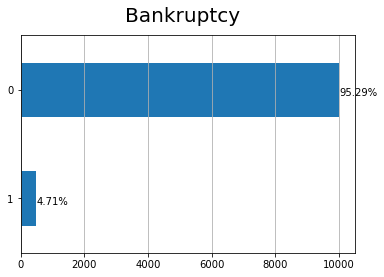

In [6]:
y = "Bankruptcy"
ax = df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show();

<I><span style="color:#2E4053">As seen above, there is a huge imbalance in the data. A vast majority of the companies <span style="color:#DE3163">(*~95%*)</span> do not go bankrupt.</span></I>

## Exploratory Data Analysis

Before deciding on the next steps, we decided to further explore the data. The objective of this next section was to understand the available metrics. While the attributes were given alphanumeric identifiers, the team also studied the intuition behind each feature. This was done to comprehend the behaviour of each attribbute, and how it would interract with the possibility of bankruptcy.

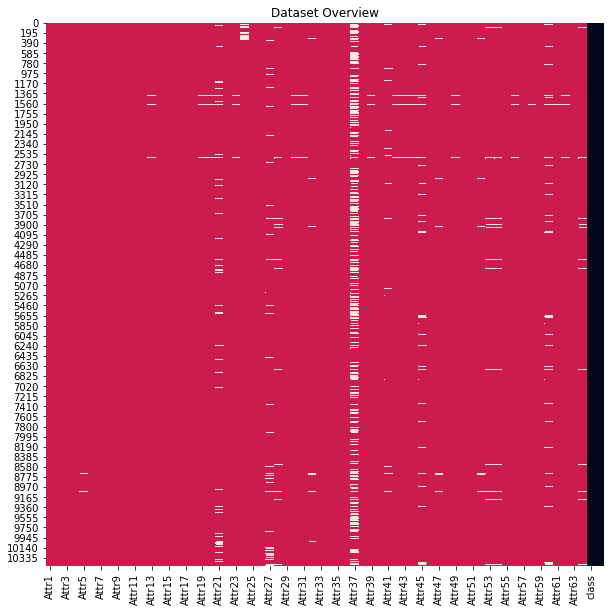

 Categerocial   Numeric   NaN 


In [7]:
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
plt.figure(figsize=(10,10))
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ");

<I><span style="color:#2E4053">
* As we can observe from the figure above, **Attr37** contains a lot of **missing values**, we'll investigate that in detail later.
* Class is the variable we want to predict, it containts 2 classes b'0' and b'1', therefore this usecase is a **Binary Classification Problem**. </span></I>

In [8]:
#Missing values by class
df.groupby('Bankruptcy').count().rsub(df.groupby('Bankruptcy').size(), axis=0)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
Bankruptcy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,17,25,0,0,13,2,0,0,17,40,0,8,13,13,0,40,40,667,0,40,227,0,13,548,214,0,40,40,98,17,13,0,0,4511,0,40,17,202,40,40,40,549,17,85,0,40,13,0,85,214,214,0,40,0,27,0,550,15,40,17,214,0
1,0,0,0,1,0,0,0,1,1,0,0,1,3,0,0,1,1,0,3,3,140,0,3,0,0,1,167,14,0,3,3,3,1,1,0,0,225,0,3,1,0,3,3,3,42,1,1,0,3,1,0,1,14,14,0,3,0,2,0,42,2,3,1,14,0


<i><span style="color:#2E4053">While <span style="color:#DE3163">Attr37</span> has an overall high number of missing data points, <span style="color:#DE3163">Attr21</span> and <span style="color:#DE3163">Attr37</span> have a high number of missing data points in the bankrupt class (class=b'1'). These need to be monitored further.</span></i>

In [9]:
def mySummary(Attribute):
    print(df[Attribute].groupby(df.Bankruptcy).describe().round(decimals=1));
colVals=df.columns;
interact(mySummary, Attribute=colVals);

interactive(children=(Dropdown(description='Attribute', options=('Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', …

In [10]:
# Checking percentage of missing values
missing_data = pd.DataFrame({'Total_Missing': (df.isnull().sum()),
                             'Class0_Missing': (df[df['Bankruptcy']==0].isnull().sum()),
                             'Class1_Missing': (df[df['Bankruptcy']==1].isnull().sum()),
                             '%Total_Missing': ((df.isnull().sum()/len(df.index))*100).astype('int'),
                             '%Class0_Missing': ((df[df['Bankruptcy']==0].isnull().sum()/len(df[df['Bankruptcy']==0].index))*100).astype('int'),
                             '%Class1_Missing': ((df[df['Bankruptcy']==1].isnull().sum()/len(df[df['Bankruptcy']==1].index))*100).astype('int')})

missing_data2 = missing_data[missing_data['%Total_Missing']>=1]

def custom_style(row):

    color = 'white'
    if 15 >= row.values[-1] > 5 :
        color = 'yellow'
    elif row.values[-1] > 15 :
        color = 'orange'

    return ['background-color: %s' % color]*len(row.values)

missing_data2.style.apply(custom_style, axis=1)

,Total_Missing,Class0_Missing,Class1_Missing,%Total_Missing,%Class0_Missing,%Class1_Missing
Attr21,807,667,140,7,6,28
Attr24,227,227,0,2,2,0
Attr27,715,548,167,6,5,33
Attr28,228,214,14,2,2,2
Attr37,4736,4511,225,45,45,45
Attr41,202,202,0,1,2,0
Attr45,591,549,42,5,5,8
Attr53,228,214,14,2,2,2
Attr54,228,214,14,2,2,2
Attr60,592,550,42,5,5,8


<i><span style="color:#2E4053">Only looking at attributes with at least 1% of the values missing.</span></i>

In [11]:
#Creating sub data frames for better interpretability 
df0 = df[['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Bankruptcy']]
df1 = df[['Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Bankruptcy']]
df2 = df[['Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Bankruptcy']]
df3 = df[['Attr31', 'Attr32', 'Attr33', 'Attr34','Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Bankruptcy']]
df4 = df[['Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Bankruptcy']]
df5 = df[['Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'Bankruptcy']]

In [12]:
#Checking difference between mean and median for all attributes
def myDiff(DataFrame):
    if DataFrame == "df0":
        avgg_df0 = df0.groupby("Bankruptcy").agg(np.mean)
        df00 = df0[['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Bankruptcy']]
        avgg_df00 = df00.groupby("Bankruptcy").agg(np.mean)
        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
        avgg_df00.plot.bar(stacked=True, ax=axes[0])
        avgg_df0.plot(kind="bar", y="Attr5", ax=axes[1], title = "Average distribution of Attr5")
    if DataFrame == "df1":
        avgg_df1 = df1.groupby("Bankruptcy").agg(np.mean)
        fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
        avgg_df1.plot(kind="bar", y="Attr12", ax=axes[1], title = "Average distribution of Attr12")
        avgg_df1.plot(kind="bar", y="Attr15", ax=axes[2], title = "Average distribution of Attr15")
        df11 = df1[['Attr11', 'Attr13', 'Attr14', 'Attr18', 'Attr19', 'Bankruptcy']]
        avgg_df11 = df11.groupby("Bankruptcy").agg(np.mean)
        avgg_df11.plot.bar(stacked=True, ax=axes[0])
        fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
        avgg_df1.plot(kind="bar", y="Attr16", ax=axes[0], title = "Average distribution of Attr16")
        avgg_df1.plot(kind="bar", y="Attr17", ax=axes[1], title = "Average distribution of Attr17")
        avgg_df1.plot(kind="bar", y="Attr20", ax=axes[2], title = "Average distribution of Attr20")
    if DataFrame == "df2":
        avgg_df2 = df2.groupby("Bankruptcy").agg(np.mean)
        fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
        df22 = df2[['Attr21', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr28', 'Attr29', 'Attr30', 'Bankruptcy']]
        avgg_df22 = df22.groupby("Bankruptcy").agg(np.mean)
        avgg_df22.plot.bar(stacked=True, ax=axes[0])
        avgg_df2.plot(kind="bar", y="Attr22", ax=axes[1], title = "Average distribution of Attr22")
        avgg_df2.plot(kind="bar", y="Attr27", ax=axes[2], title = "Average distribution of Attr27")
    if DataFrame == "df3":
        avgg_df3 = df3.groupby("Bankruptcy").agg(np.mean)
        fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
        df33 = df3[['Attr31', 'Attr34','Attr35', 'Attr36', 'Attr38', 'Attr39', 'Attr40', 'Bankruptcy']]
        avgg_df33 = df33.groupby("Bankruptcy").agg(np.mean)
        avgg_df33.plot.bar(stacked=True, ax=axes[0])
        avgg_df3.plot(kind="bar", y="Attr32", ax=axes[1], title = "Average distribution of Attr32")
        avgg_df3.plot(kind="bar", y="Attr33", ax=axes[2], title = "Average distribution of Attr33")
    if DataFrame == "df4":
        avgg_df4 = df4.groupby("Bankruptcy").agg(np.mean)
        fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
        df44 = df4[[ 'Attr42', 'Attr46', 'Attr48', 'Attr49', 'Attr50', 'Bankruptcy']]
        avgg_df44 = df44.groupby("Bankruptcy").agg(np.mean)
        avgg_df44.plot.bar(stacked=True, ax=axes[0])
        avgg_df4.plot(kind="bar", y="Attr41", ax=axes[1], title = "Average distribution of Attr41")
        avgg_df4.plot(kind="bar", y="Attr43", ax=axes[2], title = "Average distribution of Attr43")
        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
        avgg_df4.plot(kind="bar", y="Attr44", ax=axes[0], title = "Average distribution of Attr44")
        avgg_df4.plot(kind="bar", y="Attr47", ax=axes[1], title = "Average distribution of Attr47")
    if DataFrame == "df5":
        avgg_df5 = df5.groupby("Bankruptcy").agg(np.mean)
        fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
        df55 = df5[[ 'Attr52', 'Attr53', 'Attr54', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr61', 'Attr63', 'Bankruptcy']]
        avgg_df55 = df55.groupby("Bankruptcy").agg(np.mean)
        avgg_df55.plot.bar(stacked=True, ax=axes[0])
        avgg_df5.plot(kind="bar", y="Attr51", ax=axes[1], title = "Average distribution of Attr51")
        avgg_df5.plot(kind="bar", y="Attr55", ax=axes[2], title = "Average distribution of Attr55")
        fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
        avgg_df5.plot(kind="bar", y="Attr60", ax=axes[0], title = "Average distribution of Attr60")
        avgg_df5.plot(kind="bar", y="Attr62", ax=axes[1], title = "Average distribution of Attr62")
        avgg_df5.plot(kind="bar", y="Attr64", ax=axes[2], title = "Average distribution of Attr64")
myFrames=['df0', 'df1', 'df2', 'df3', 'df4', 'df5'];
interact(myDiff, DataFrame=myFrames);

interactive(children=(Dropdown(description='DataFrame', options=('df0', 'df1', 'df2', 'df3', 'df4', 'df5'), va…

<i><span style="color:#2E4053">Comparing the difference between the mean and median of attributes. The attributes have been split into 6 sets of roughly 10 attributes each. We have also deep dived into specific attributes, where the difference was more prominently visible.<br> <br>Please select the relevant dataframe by looking at the exact split in the previous cell.</span></i>

### Creating Altman's Z-Score

In [13]:
df['ZScore'] = (1.2*df['Attr3']) + (1.4*df['Attr6']) + (3.3*df['Attr7']) + (0.6*df['Attr8']) + (1.0*df['Attr9'])
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,ZScore,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,Bankruptcy
0,3.611632,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,0.219460,0.531390,0.142330,0.219460,592.24,0.61630,2.4213,0.219460,0.122720,37.573,0.99690,0.295100,0.097402,0.75641,0.46359,0.50669,1.97370,0.32417,5.9473,0.224930,0.122720,100.820,3.6203,0.71453,0.295100,1.8079,123140.0000,0.46359,0.165010,0.212820,0.041124,0.165010,95.682,58.109,0.946210,0.90221,44.941,0.260030,0.145400,1.3480,0.41299,0.27622,1.0457,1.0458,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0',0
1,3.210925,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,0.175790,0.383170,0.126470,0.171850,829.46,0.44004,2.1721,0.171850,0.107280,60.954,5.08890,0.175710,0.091295,NaN,0.17523,0.38442,44.59300,1.04860,4.0792,0.243840,0.109740,105.090,3.4733,3.38360,0.044076,1.6018,NaN,0.53962,0.027516,0.164060,0.074333,0.109690,149.750,88.801,0.546690,1.03300,62.678,0.144970,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0',0
2,3.669311,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,0.004572,0.020219,0.030966,0.004572,2094.10,0.17430,4.4225,0.004572,0.003592,53.881,0.67451,0.040610,0.000468,0.23470,0.67566,0.15672,0.32153,1.71070,4.6220,0.036196,0.003592,65.345,5.5857,0.17960,0.040610,1.3425,NaN,0.67566,0.031907,0.844690,0.098528,0.031907,150.130,96.251,0.003168,2.32900,54.296,0.005769,0.004533,3.1599,0.22612,0.17903,2.3667,2.3667,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0',0
3,3.043024,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,0.024526,0.069747,0.036812,0.024526,3299.40,0.11063,2.3129,0.024526,0.018876,86.317,0.62795,0.055446,0.018876,0.56944,0.56453,0.11063,0.44844,0.73869,4.2600,0.286240,0.018876,103.810,3.5161,0.12824,0.055446,1.3068,3.9624,0.64524,0.042673,0.178260,0.180500,0.042673,158.550,72.237,0.079819,0.90954,90.707,0.032141,0.024737,1.4504,0.35164,0.28440,1.5139,1.7303,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0',0
4,3.366526,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,0.238810,0.633170,0.187800,0.233580,602.31,0.60600,2.4094,0.233580,0.174410,140.860,1.20390,0.234930,0.140590,0.00000,0.57250,0.49687,44.94700,1.18530,4.6033,0.306910,0.177840,122.090,2.9897,2.65740,0.236350,1.3393,4.5490,0.62769,0.176480,0.013769,0.054712,0.175420,192.450,51.585,0.364290,0.52685,171.050,0.216990,0.162030,1.7136,0.36891,0.33449,2.0256,2.1735,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0',0


<i><span style="color:#2E4053">As per [Investopedia](https://www.investopedia.com/terms/a/altman.asp), Altman Z-score is the output of a credit-strength test that gauges a publicly traded manufacturing company's likelihood of bankruptcy. While the metric was created primarily for the manufacturing domain, it might help with our problem. This KPI was created using existing metrics in the dataset.</span></i>

<i><span style="color:#2E4053"><b>Altman's Z Score = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E</b><i><span style="color:#2E4053">
    <i><span style="color:#2E4053"><ul><li>A = working capital / total assets</li><li>B = retained earnings / total assets</li><li>C = earnings before interest and tax / total assets</li><li>D = market value of equity / total liabilities</li><li>E = sales / total assets</li></ul><i><span style="color:#2E4053">

## Data Imputation

There are multiple options for filling missing data values. Please note the following:<br> <ul><li>First of, **Attribute 37** has 45% missing values and hence will not be considered for feature selection. This seems like a very high percentage to impute while maintaining the quality of the variable.</li><br> <li>**Attributes 21 and 27** also have a high percentage of missing values for the bankrupt class {bankrupt=1.0}. However, these will simply be imputed since the lack of data in one of the two classes might be a distinguishing factor in itslef.</li><br> <li>For the remaining features, the **mean is highly susceptible to outliers**. This leads to mean being higher than the cutoff for Q3, hence median is the better metric to be imputed.</li><br> <li>All the comparisons are performed within the two bankruptcy classes.</li><br><b><li><span style="color:#DE3163">Hence, imputing median by class for missing values.</span></li></b>

In [14]:
#Dropping Attr37
df.drop(columns=['Attr37'], inplace=True)

In [15]:
df.shape
df.head()

(10503, 66)

,ZScore,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,Bankruptcy
0,3.611632,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,0.219460,0.531390,0.142330,0.219460,592.24,0.61630,2.4213,0.219460,0.122720,37.573,0.99690,0.295100,0.097402,0.75641,0.46359,0.50669,1.97370,0.32417,5.9473,0.224930,0.122720,100.820,3.6203,0.71453,0.295100,1.8079,0.46359,0.165010,0.212820,0.041124,0.165010,95.682,58.109,0.946210,0.90221,44.941,0.260030,0.145400,1.3480,0.41299,0.27622,1.0457,1.0458,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0',0
1,3.210925,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,0.175790,0.383170,0.126470,0.171850,829.46,0.44004,2.1721,0.171850,0.107280,60.954,5.08890,0.175710,0.091295,NaN,0.17523,0.38442,44.59300,1.04860,4.0792,0.243840,0.109740,105.090,3.4733,3.38360,0.044076,1.6018,0.53962,0.027516,0.164060,0.074333,0.109690,149.750,88.801,0.546690,1.03300,62.678,0.144970,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0',0
2,3.669311,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,0.004572,0.020219,0.030966,0.004572,2094.10,0.17430,4.4225,0.004572,0.003592,53.881,0.67451,0.040610,0.000468,0.23470,0.67566,0.15672,0.32153,1.71070,4.6220,0.036196,0.003592,65.345,5.5857,0.17960,0.040610,1.3425,0.67566,0.031907,0.844690,0.098528,0.031907,150.130,96.251,0.003168,2.32900,54.296,0.005769,0.004533,3.1599,0.22612,0.17903,2.3667,2.3667,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0',0
3,3.043024,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,0.024526,0.069747,0.036812,0.024526,3299.40,0.11063,2.3129,0.024526,0.018876,86.317,0.62795,0.055446,0.018876,0.56944,0.56453,0.11063,0.44844,0.73869,4.2600,0.286240,0.018876,103.810,3.5161,0.12824,0.055446,1.3068,0.64524,0.042673,0.178260,0.180500,0.042673,158.550,72.237,0.079819,0.90954,90.707,0.032141,0.024737,1.4504,0.35164,0.28440,1.5139,1.7303,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0',0
4,3.366526,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,0.238810,0.633170,0.187800,0.233580,602.31,0.60600,2.4094,0.233580,0.174410,140.860,1.20390,0.234930,0.140590,0.00000,0.57250,0.49687,44.94700,1.18530,4.6033,0.306910,0.177840,122.090,2.9897,2.65740,0.236350,1.3393,0.62769,0.176480,0.013769,0.054712,0.175420,192.450,51.585,0.364290,0.52685,171.050,0.216990,0.162030,1.7136,0.36891,0.33449,2.0256,2.1735,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0',0


<i><span style="color:#2E4053">As described above, creating a new dataframe with the median imputed for missing values.</span></i>

In [16]:
df.describe()

,ZScore,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Bankruptcy
count,10487.000000,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,10503.000000,10485.000000,10460.000000,10503.000000,1.049500e+04,10489.000000,10489.000000,10503.000000,10460.000000,10460.000000,9696.000000,10503.000000,10460.000000,10276.000000,10503.000000,10489.000000,9.788000e+03,10275.000000,10503.000000,10460.000000,10460.000000,1.040200e+04,10485.000000,10489.000000,10503.000000,10503.000000,10503.000000,10460.000000,10485.000000,10301.000000,10460.000000,10460.000000,10460.000000,9912.000000,10485.000000,1.041700e+04,10503.000000,10460.000000,10489.000000,10503.000000,10417.000000,10275.000000,10275.000000,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000,10503.000000
mean,13.463474,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,0.086764,2.411266,0.376563,0.065634,3.004332e+03,2.729654,20.511539,0.070739,-0.170778,68.448531,4.670725,0.075676,-0.176466,0.211936,0.196153,2.580730,1.185945e+03,6.092884,3.921179,0.459346,-0.177084,1.171670e+03,8.419887,5.398356,0.071075,1.981250,0.465510,-0.076355,2.381026,28.707178,-0.141671,195.389286,126.940260,17.451297,8.978029,5.424888e+02,0.004834,-0.217844,8.686024,0.497135,11.244158,5.725829,6.708568,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800,0.047129
std,431.908920,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,0.655407,111.459642,49.675550,0.651151,1.091981e+05,110.233475,721.812766,0.835328,11.210201,1083.699904,305.897238,0.581734,11.149274,2.093845,6.742161,108.823993,3.469123e+04,94.713753,0.840528,71.755042,11.157003,6.841270e+04,37.696764,69.035263,0.572124,2.630705,6.425362,8.079334,37.819839,2845.290346,10.787555,3303.309554,2766.505503,1720.342176,523.565601,3.126416e+04,0.629770,11.910935,522.528325,6.420885,851.867915,89.708042,93.511530,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315,0.211926
min,-1263.162252,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,-17.692000,-1543.800000,-631.710000,-17.692000,-2.321800e+06,-204.300000,-0.043411,-17.692000,-771.650000,-0.001439,-1.107500,-17.692000,-771.650000,-60.742000,-500.750000,-204.300000,-1.901300e+05,-690.400000,-0.358530,-6351.700000,-771.390000,-9.295600e+03,-1.921900,-1696.000000,-17.073000,-0.000084,-479.730000,-551.110000,-7.081900,-667.730000,-765.800000,-25113.000000,-25113.000000,-74385.000000,-6.469200,-1.730300e+01,-17.692000,-905.750000,0.002080,0.000000,-25.467000,-869.040000,-706.490000,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,1.795277,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,0.009809,0.006183,0.020740,0.002131,1.865950e+02,0.060302,1.449200,0.002131,0.001648,14.253750,0.796673,0.000000,0.000556,0.014938,0.135695,0.055067,0.000000e+00,0.027178,3.393200,0.073850,0.004012,4.471900e+01,2.785900,0.367460,0.001730,1.043500,0.426810,0.001557,0.053666,0.022026,0.000000,65.627250,34.214750,0.006157,0.602830,1.494100e+01,-0.048988,-0.036186,0.749370,0.177200,0.122470,0.667285,0.950435,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.0233

In [17]:
df_imput = df.copy(deep=True)
df_imput = df_imput.fillna(df.groupby('Bankruptcy').transform('median'))

In [18]:
df_imput.describe()

,ZScore,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Bankruptcy
count,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000,10503.000000,1.050300e+04,10503.000000,1.050300e+04,10503.000000,10503.000000,10503.000000
mean,13.447591,0.052844,0.619911,0.095490,9.966167,-1.344447e+03,-0.121159,0.065624,19.116068,1.819070,0.366093,0.086764,2.407406,0.375292,0.065634,3.002654e+03,2.726329,20.487054,0.070739,-0.169947,68.310497,4.385225,0.075676,-0.175632,0.210998,0.196153,2.577577,1.105281e+03,5.970487,3.921179,0.458367,-0.176198,1.161146e+03,8.413460,5.393889,0.071075,1.981250,0.465510,-0.075906,2.377282,28.156578,-0.140949,194.995581,126.642835,16.484166,8.964458,5.383505e+02,0.004834,-0.216928,8.676086,0.497135,11.153809,5.627422,6.592662,6.638549e+03,-0.527703,-0.014817,3.840801,1.429319,5.396899e+02,13.923654,1.352757e+02,9.088363,35.078624,0.047129
std,431.579975,0.647797,6.427041,6.420056,523.243080,1.184394e+05,6.970625,0.651152,717.278474,7.580584,6.428603,0.655407,111.364122,49.573752,0.651151,1.091565e+05,110.160013,721.331800,0.835328,11.187235,1081.481194,293.911052,0.581734,11.126433,2.071102,6.742161,108.751468,3.349082e+04,93.683591,0.840528,71.607994,11.134148,6.808302e+04,37.664766,68.989341,0.572124,2.630705,6.425362,8.062780,37.787522,2817.796456,10.765453,3296.545706,2760.839921,1671.239869,523.116826,3.113592e+04,0.629770,11.886534,522.179994,6.420885,848.373390,88.731371,92.494159,5.989196e+04,55.863902,18.684047,189.938495,77.273270,3.609736e+04,83.636834,2.593790e+04,31.392591,423.648786,0.211926
min,-1263.162252,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,-17.692000,-1543.800000,-631.710000,-17.692000,-2.321800e+06,-204.300000,-0.043411,-17.692000,-771.650000,-0.001439,-1.107500,-17.692000,-771.650000,-60.742000,-500.750000,-204.300000,-1.901300e+05,-690.400000,-0.358530,-6351.700000,-771.390000,-9.295600e+03,-1.921900,-1696.000000,-17.073000,-0.000084,-479.730000,-551.110000,-7.081900,-667.730000,-765.800000,-25113.000000,-25113.000000,-74385.000000,-6.469200,-1.730300e+01,-17.692000,-905.750000,0.002080,0.000000,-25.467000,-869.040000,-706.490000,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,1.797447,0.000686,0.253955,0.017461,1.040900,-5.196150e+01,0.000000,0.002118,0.431935,1.011350,0.297340,0.009809,0.006372,0.020868,0.002131,1.867450e+02,0.060454,1.450350,0.002131,0.001742,14.400500,0.813550,0.000000,0.000639,0.017663,0.135695,0.055273,1.449050e-02,0.035968,3.393200,0.074598,0.004132,4.511250e+01,2.789700,0.370620,0.001730,1.043500,0.426810,0.001677,0.053836,0.022861,0.000000,65.740000,34.298000,0.014509,0.603425,1.514850e+01,-0.048988,-0.035852,0.749810,0.177200,0.123250,0.680975,0.958225,1.462100e+01,0.005336,0.006796,0.875700,0.000000,5.734300e+00,4.490600,4.092850e+01,3.064050,2.05

In [19]:
#Confirming that there is nore more missing data
if sum(df_imput.isnull().sum()) == 0:
    print('No more missing data')
else:
    print('Error: There is still some missing data')

No more missing data


In [20]:
# Deleting duplicate rows
sum(df_imput.duplicated())
df_imput.drop_duplicates(inplace=True)
df_imput['Bankruptcy'].value_counts()

87

0    9923
1     493
Name: Bankruptcy, dtype: int64

<i><span style="color:#2E4053">There were 87 duplicate rows that were dropped. Please note that only 2 of them were from the bankruptcy class.</span></i>

## Correlation Analysis

<i><span style="color:#2E4053"> Analysing the correlation between variables to see if some of them can be ignored on the basis of a strong relationship with another variable. </span></i>

In [21]:
df_corr = df_imput.copy(deep=True)

In [22]:
#Dropping the class column
df_corr.drop(columns=['class'], inplace=True)

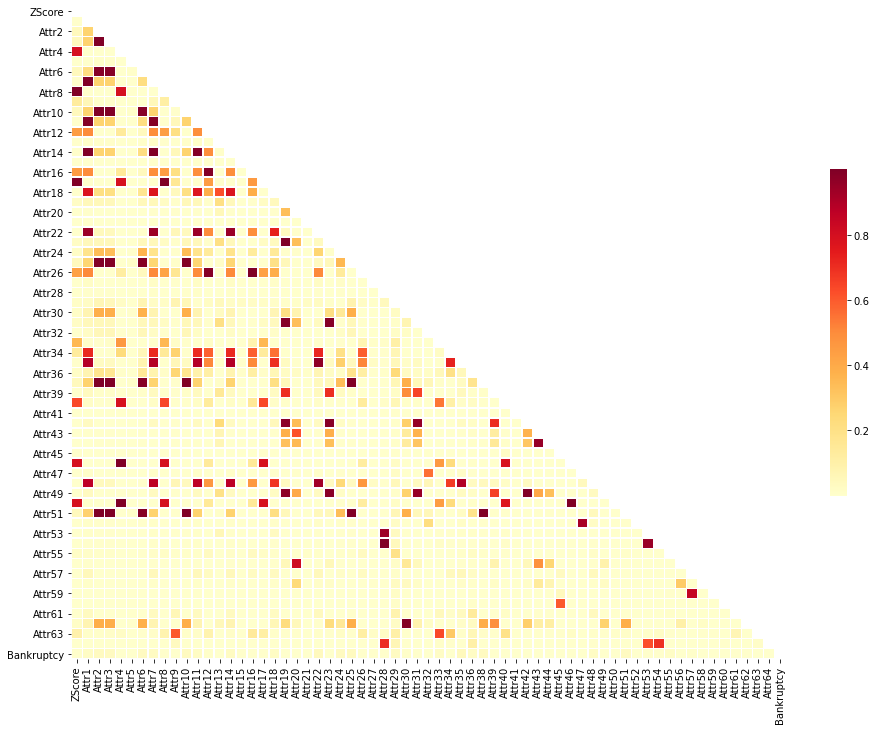

In [23]:
#Plotting the absolute correlation matrix
fig, ax = plt.subplots(figsize=(16,12)) 
abscorr = df_corr.corr().abs()

mask = np.zeros_like(abscorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

 
sns.heatmap(abscorr, mask=mask,
            square=False, linewidths=.5, cbar_kws={"shrink": .5},cmap='YlOrRd');

<i><span style="color:#2E4053"> As we can see above, multiple variables are correlated with each other. Let's check for variable groups of collinearity. </span></i>

In [24]:
#Let's check for groups of collinearity with correlation
threshold = 0.90

cumulative_ = []
countclus = 0

for name in df_corr.columns:
    
    if name not in cumulative_:
            clus = pd.DataFrame()
            clus["Corr"] = abscorr[name][abs(abscorr[name])>threshold].round(decimals=3)
            clus["Count"] = df_corr.count()[clus.index]
            
            if not clus.empty:
                countclus = countclus+1
                cumulative_.extend(clus.index)
                print(clus,"\n")

print("Number of Variables to Use: ", countclus);

         Corr  Count
ZScore  1.000  10416
Attr8   0.999  10416
Attr17  0.999  10416 

         Corr  Count
Attr1   1.000  10416
Attr7   0.999  10416
Attr11  0.989  10416
Attr14  0.999  10416
Attr22  0.942  10416 

         Corr  Count
Attr2   1.000  10416
Attr3   0.998  10416
Attr6   0.986  10416
Attr10  1.000  10416
Attr25  0.996  10416
Attr38  0.999  10416
Attr51  0.999  10416 

         Corr  Count
Attr4   1.000  10416
Attr46  1.000  10416
Attr50  0.999  10416 

       Corr  Count
Attr5   1.0  10416 

       Corr  Count
Attr9   1.0  10416 

         Corr  Count
Attr12  1.000  10416
Attr16  0.989  10416
Attr26  0.987  10416 

        Corr  Count
Attr13   1.0  10416 

        Corr  Count
Attr15   1.0  10416 

        Corr  Count
Attr18   1.0  10416 

         Corr  Count
Attr19  1.000  10416
Attr23  0.999  10416
Attr31  0.987  10416
Attr42  0.974  10416
Attr49  0.971  10416 

        Corr  Count
Attr20   1.0  10416 

        Corr  Count
Attr21   1.0  10416 

        Corr  Count
Attr24

<b><i><span style="color:#2E4053">Selecting only one from a group of features which have <span style="color:#DE3163">>90%</span> correlation. This is being used as a strategy to reduce the number of variables to analyse. Since the attributes with such high correlation are expected to behave similarly, we do not expect this to drastically change the output. This helps reduce the feature count from 64 to 39 (miunus column Bankruptcy, since it is our label). </span></i></b>

<b><i><span style="color:#2E4053">Selected Attributes:</span></i></b><br>
<b><i><span style="color:#2E4053">"Attr1", "Attr2", "Attr4", "Attr5", "ZScore", "Attr9", "Attr12", "Attr13", "Attr15", "Attr18", "Attr19", "Attr20", "Attr21", "Attr22", "Attr24", "Attr27", "Attr28", "Attr29", "Attr30", "Attr32", "Attr33", "Attr34", "Attr36", "Attr39", "Attr40", "Attr41", "Attr43", "Attr45", "Attr47", "Attr48", "Attr55", "Attr56", "Attr57", "Attr58", "Attr59", "Attr60", "Attr61", "Attr63", "Attr64"</span></i></b><br>


In [25]:
# scatter plot is used for visulazing correlated variables
def myScatter(Attribute1, Attribute2):
    plt.rcParams["figure.figsize"]=(15,10);
    sns.scatterplot(x=df_imput[Attribute1], y=df_imput[Attribute2], hue=df_imput["Bankruptcy"])
    plt.title("Scatter Plot")
    plt.xlabel(Attribute1)
    plt.ylabel(Attribute2);
colVals=df_imput.columns;
interact(myScatter, Attribute1=colVals, Attribute2=colVals);

interactive(children=(Dropdown(description='Attribute1', options=('ZScore', 'Attr1', 'Attr2', 'Attr3', 'Attr4'…

In [26]:
df_reduced = df_imput[["Attr1", "Attr2", "Attr4", "Attr5", "Attr9", "Attr12", "Attr13", "Attr15", "Attr18", "Attr19", "Attr20", "Attr21", "Attr22", "Attr24", "Attr27", "Attr28", "Attr29", "Attr30", "Attr32", "Attr33", "Attr34", "Attr36", "Attr39", "Attr40", "Attr41", "Attr43", "Attr45", "Attr47", "Attr48", "Attr55", "Attr56", "Attr57", "Attr58", "Attr59", "Attr60", "Attr61", "Attr63", "Attr64", "ZScore", "Bankruptcy"]]

In [27]:
df_reduced

,Attr1,Attr2,Attr4,Attr5,Attr9,Attr12,Attr13,Attr15,Attr18,Attr19,Attr20,Attr21,Attr22,Attr24,Attr27,Attr28,Attr29,Attr30,Attr32,Attr33,Attr34,Attr36,Attr39,Attr40,Attr41,Attr43,Attr45,Attr47,Attr48,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64,ZScore,Bankruptcy
0,0.174190,0.41299,1.34800,-28.9820,1.19610,0.531390,0.142330,592.24,0.219460,0.122720,37.5730,0.99690,0.295100,0.756410,1.97370,0.324170,5.9473,0.224930,100.820,3.6203,0.714530,1.8079,0.165010,0.212820,0.041124,95.682,0.946210,44.9410,0.260030,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,4.3303,4.0341,3.611632,0
1,0.146240,0.46038,1.62940,2.5952,1.60180,0.383170,0.126470,829.46,0.171850,0.107280,60.9540,5.08890,0.175710,0.168500,44.59300,1.048600,4.0792,0.243840,105.090,3.4733,3.383600,1.6018,0.027516,0.164060,0.074333,149.750,0.546690,62.6780,0.144970,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,3.5716,5.9500,3.210925,0
2,0.000595,0.22612,3.15990,84.8740,1.00770,0.020219,0.030966,2094.10,0.004572,0.003592,53.8810,0.67451,0.040610,0.234700,0.32153,1.710700,4.6220,0.036196,65.345,5.5857,0.179600,1.3425,0.031907,0.844690,0.098528,150.130,0.003168,54.2960,0.005769,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,5.6287,4.4581,3.669311,0
3,0.024526,0.43236,1.78330,-10.1050,1.05090,0.069747,0.036812,3299.40,0.024526,0.018876,86.3170,0.62795,0.055446,0.569440,0.44844,0.738690,4.2600,0.286240,103.810,3.5161,0.128240,1.3068,0.042673,0.178260,0.180500,158.550,0.079819,90.7070,0.032141,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,3.6950,3.4844,3.043024,0
4,0.188290,0.41504,1.92790,-58.2740,1.33930,0.633170,0.187800,602.31,0.233580,0.174410,140.8600,1.20390,0.234930,0.000000,44.94700,1.185300,4.6033,0.306910,122.090,2.9897,2.657400,1.3393,0.176480,0.013769,0.054712,192.450,0.364290,171.0500,0.216990,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,3.6303,4.6375,3.366526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,0.002861,0.58067,0.51658,-31.8660,1.01200,0.006178,0.018378,2879.30,0.002861,0.000714,9.5696,0.98388,0.026943,0.002861,0.86943,-0.294260,4.2857,0.140800,42.707,8.5466,0.046400,4.0103,0.006727,0.068906,0.195420,18.893,0.027246,9.6842,-0.043805,-4321.5,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,8.6489,5.2646,1.127945,1
10499,-0.051968,0.55254,2.16980,12.7480,0.94694,-0.273160,0.020928,6875.90,-0.034361,-0.024518,25.1850,0.72732,-0.043590,-0.034361,0.86943,0.202390,4.9622,0.376410,31.023,11.7660,-0.078891,1.4780,-0.031103,0.201130,0.903660,64.496,-0.537390,23.8490,-0.107280,13488.0,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,11.1410,1.9276,1.339272,1
10500,-0.135900,0.83954,0.46526,-145.3100,1.09990,-0.206160,-0.119880,-2324.00,-0.131860,-0.119880,58.1790,0.95313,-0.097358,-0.131860,-2.76940,-0.486890,4.0926,0.756070,247.970,2.0074,1.529300,1.1871,-0.101070,0.013770,-0.287440,95.821,-0.775120,49.8440,-0.097358,-4233.0,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,1.7198,1.5659,0.062260,1
10501,0.009423,0.50028,1.52300,-10.1580,1.01230,0.015392,0.014470,6789.00,0.007700,0.004143,61.1650,0.75106,0.023370,0.007700,0.86943,1.098900,4.0116,0.257280,99.452,3.6701,0.046714,1.8760,0.012573,0.046953,0.386400,145.000,0.030251,61.9190,0.004173,2686.9,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,3.7154,7.8068,1.958798,1


In [28]:
df_reduced.shape

(10416, 40)

In [99]:
# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

## Data Modelling

## Baseline models and Feature Selection

<b><i><span style="color:#2E4053"> Creating a baseline to benchmark model performance. Trying to further reduce the number of features to improve classification performance of the model. Different feature selection techniques have been explored here to identify the most important features. </span></i>

In [29]:
# Split df into x and y
y = df_reduced['Bankruptcy']
X = df_reduced.drop(columns=['Bankruptcy'], axis = 1)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, shuffle=True, random_state=1)

In [30]:
prop_train = y_train.sum()/y_train.count()
prop_test = y_test.sum()/y_test.count()
print("Proportion of bankruptcies(class1) in train: {:.2f}".format(prop_train))
print("Proportion of bankruptcies(class1) in test: {:.2f}".format(prop_test))

Proportion of bankruptcies(class1) in train: 0.05
Proportion of bankruptcies(class1) in test: 0.05


In [31]:
X_train.shape, X_test.shape

((7291, 39), (3125, 39))

#### Baseline model 1 - Applying Random Forest Algorithm

In [32]:
# Applying Random Forest Algorithm
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [33]:
y_pred_baseline_rf = random_forest_model.predict(X_test)
print(classification_report(y_test, y_pred_baseline_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2977
           1       0.85      0.19      0.31       148

    accuracy                           0.96      3125
   macro avg       0.90      0.59      0.64      3125
weighted avg       0.96      0.96      0.95      3125



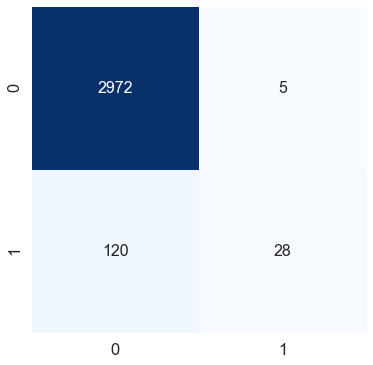

In [101]:
conf_matrix(y_test, y_pred_baseline_rf)

### 1.1 Feature selection with Random Forest Classifier (Select from Model)
#### Using baseline model for feature selection with random forest classifier

In [35]:
feature_scores = pd.Series(random_forest_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Attr27    0.100326
Attr21    0.042666
Attr34    0.041117
Attr24    0.036496
Attr58    0.030513
Attr56    0.030100
Attr45    0.028799
Attr40    0.026553
Attr60    0.026059
Attr22    0.025972
Attr20    0.025952
Attr15    0.025113
Attr13    0.025040
Attr41    0.024810
Attr39    0.024754
Attr57    0.024508
Attr47    0.023421
Attr48    0.022544
Attr29    0.022153
Attr9     0.022094
Attr12    0.021910
Attr61    0.021781
Attr64    0.021641
Attr55    0.021474
Attr1     0.021419
ZScore    0.021389
Attr2     0.020906
Attr36    0.020341
Attr28    0.020204
Attr43    0.019811
Attr30    0.019809
Attr18    0.019705
Attr19    0.019694
Attr4     0.018856
Attr32    0.018401
Attr5     0.016374
Attr33    0.016249
Attr59    0.015891
Attr63    0.015156
dtype: float64

In [36]:
#Identify And select most important features.
#Then we use SelectFromModel object from sklearn to automatically select the features.
#SelectFromModel select features which importance is greater than the mean. 
#Importance of all the features by default, but we can alter this threshold if we want.
features = SelectFromModel(random_forest_model)

#Train the selector
features.fit(X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier())

In [37]:
#Make a list and count the selected features
selected_feat= X_train.columns[(features.get_support())]
len(selected_feat)

10

In [38]:
#Names of selected features
print(selected_feat)

Index(['Attr20', 'Attr21', 'Attr24', 'Attr27', 'Attr34', 'Attr39', 'Attr45',
       'Attr56', 'Attr58', 'Attr60'],
      dtype='object')


In [39]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = X_train[selected_feat]
X_important_test = X_test[selected_feat]

In [40]:
X_important_train.head()

,Attr20,Attr21,Attr24,Attr27,Attr34,Attr39,Attr45,Attr56,Attr58,Attr60
5696,22.607,0.80884,0.526800,5.8533,4.9933,0.069786,0.511900,0.069786,0.95709,16.1460
4605,31.895,0.86898,0.018215,-2.9091,7.2835,-0.019692,0.052817,-0.019692,0.99493,11.4440
758,94.791,0.98273,0.179030,7.1780,3.7179,0.030507,0.091141,0.030507,0.97053,3.8506
7599,22.080,1.48620,-0.073380,2.4988,3.6062,0.022685,0.230230,0.022685,0.99294,16.5310
6186,12.280,2.30370,0.137540,1.8149,6.1727,0.050013,1.155800,0.050013,0.97490,29.7240


In [41]:
y_train

5696    0
4605    0
758     0
7599    0
6186    0
       ..
2596    0
3314    0
5654    0
4425    0
7541    0
Name: Bankruptcy, Length: 7291, dtype: int32

In [42]:
#Train A New Random Forest Classifier Using Only Most Important Features
clf_important = RandomForestClassifier(random_state=42,criterion = 'entropy')

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', random_state=42)

In [43]:
y_pred_class = clf_important.predict(X_important_test)
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2977
           1       0.96      0.47      0.63       148

    accuracy                           0.97      3125
   macro avg       0.97      0.73      0.81      3125
weighted avg       0.97      0.97      0.97      3125



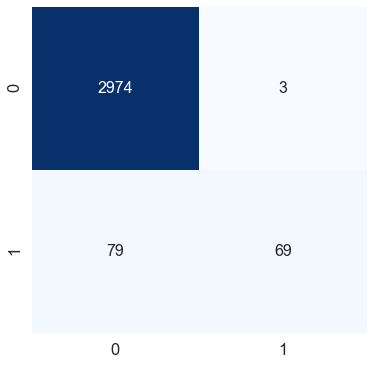

In [102]:
conf_matrix(y_test, y_pred_class)

#### After using the feature selection from the random forest and comparing it with the baseline model, we can see that the overall f1 score for the 1 class is improved. This implies that the classifier is able to focus on the important features and reduce the noise.

### Baseline model 2 - Applying Logistic Regression Model

#### Exploring other models to compare their performances

In [45]:
X_train_lr = X_train
y_train_lr = y_train

X_test_lr = X_test
y_test_lr = y_test

In [46]:
#Scale X
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_lr)
X_train_lr_1 = pd.DataFrame(scaler.transform(X_train_lr), index=X_train_lr.index, columns=X_train_lr.columns)
X_test_lr_1 = pd.DataFrame(scaler.transform(X_test_lr), index=X_test_lr.index, columns=X_test_lr.columns)

StandardScaler()

In [47]:
lr2 = LogisticRegression(random_state=42,class_weight = 'balanced')
lr2.fit(X_train_lr_1,y_train_lr)
y_lr=lr2.predict(X_test_lr_1)

LogisticRegression(class_weight='balanced', random_state=42)

In [48]:
Threshold = 0.55
SensitivityCheck = np.where(lr2.predict_proba(X_test_lr_1)[:, 1] >= Threshold, 1, 0)
SensitivityCheck
print(classification_report(y_test_lr, SensitivityCheck))
print(confusion_matrix(y_test_lr, SensitivityCheck))

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2977
           1       0.12      0.59      0.19       148

    accuracy                           0.77      3125
   macro avg       0.54      0.68      0.53      3125
weighted avg       0.93      0.77      0.83      3125

[[2308  669]
 [  61   87]]


In [49]:
print(classification_report(y_test_lr, y_lr))

              precision    recall  f1-score   support

           0       0.98      0.63      0.77      2977
           1       0.09      0.77      0.17       148

    accuracy                           0.64      3125
   macro avg       0.54      0.70      0.47      3125
weighted avg       0.94      0.64      0.74      3125



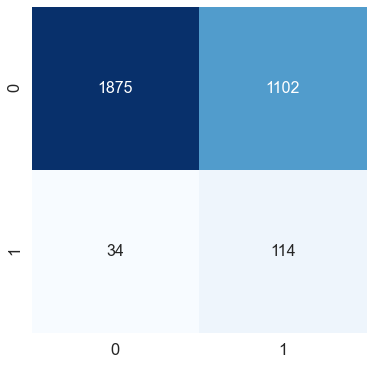

In [103]:
conf_matrix(y_test_lr, y_lr)

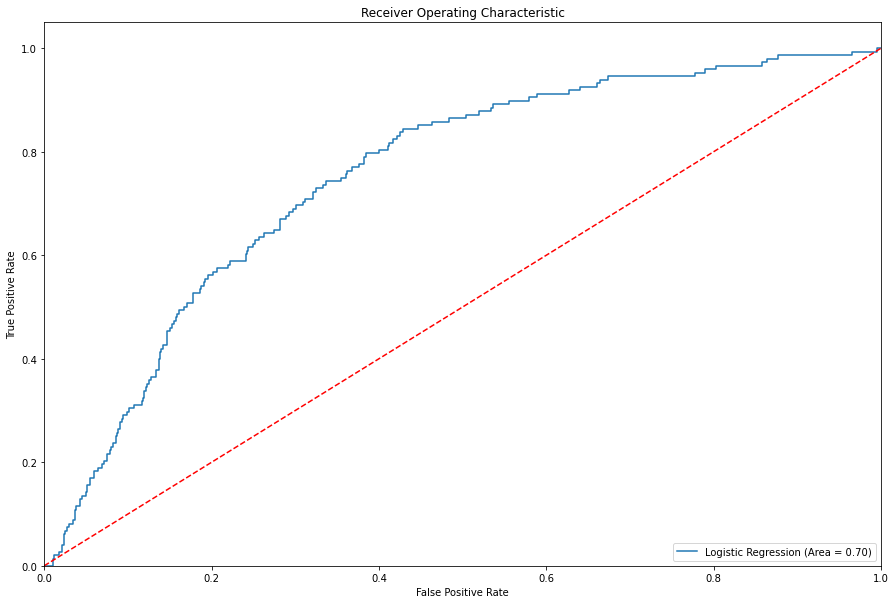

In [51]:
logit_roc_auc = roc_auc_score(y_test_lr, lr2.predict(X_test_lr_1))
fpr, tpr, thresholds = roc_curve(y_test_lr, lr2.predict_proba(X_test_lr_1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show();

#### When the class_weights = ‘balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies. Since our data is imbalanced this helps us to in giving higher weights to the minority class and lower weights to the majority class automatically.

#### Fitting and testing logistic regression model on selected features 

In [52]:
# use selected features from random forest classification
X_important_train_lr2 = X_train_lr_1[selected_feat]
X_important_test_lr2 = X_test_lr_1[selected_feat]

In [53]:
X_important_train_lr2.head()

,Attr20,Attr21,Attr24,Attr27,Attr34,Attr39,Attr45,Attr56,Attr58,Attr60
5696,-0.055678,-0.012664,0.132584,-0.032813,0.006711,0.017822,-0.006549,0.008553,-0.012503,-0.013831
4605,-0.041598,-0.012492,-0.083871,-0.033052,0.071857,0.008524,-0.006863,-0.003933,-0.012325,-0.013941
758,0.053746,-0.012167,-0.015428,-0.032777,-0.029569,0.013741,-0.006837,0.003072,-0.012440,-0.014118
7599,-0.056477,-0.010730,-0.122854,-0.032905,-0.032746,0.012928,-0.006742,0.001980,-0.012335,-0.013822
6186,-0.071333,-0.008396,-0.033086,-0.032923,0.040259,0.015768,-0.006109,0.005794,-0.012420,-0.013515


In [54]:
lr3 = LogisticRegression(penalty = 'l2',random_state=42,class_weight = 'balanced')
lr3.fit(X_important_train_lr2,y_train_lr)
y_lr2=lr3.predict(X_important_test_lr2)

LogisticRegression(class_weight='balanced', random_state=42)

In [55]:
Threshold2 = 0.522222
SensitivityCheck2 = np.where(lr3.predict_proba(X_important_test_lr2)[:, 1] >= Threshold2, 1, 0)
SensitivityCheck2
print(classification_report(y_test_lr, SensitivityCheck2))
print(confusion_matrix(y_test_lr, SensitivityCheck2))

array([0, 0, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2977
           1       0.10      0.55      0.17       148

    accuracy                           0.75      3125
   macro avg       0.54      0.65      0.51      3125
weighted avg       0.93      0.75      0.82      3125

[[2270  707]
 [  67   81]]


In [56]:
print(classification_report(y_test_lr, y_lr2))

              precision    recall  f1-score   support

           0       0.98      0.63      0.76      2977
           1       0.09      0.74      0.16       148

    accuracy                           0.63      3125
   macro avg       0.53      0.68      0.46      3125
weighted avg       0.94      0.63      0.73      3125



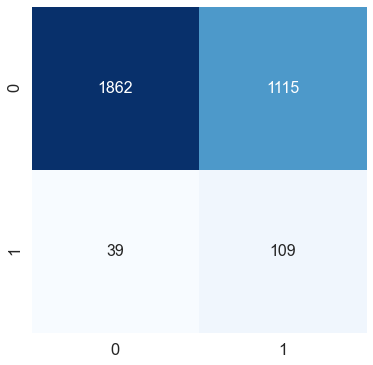

In [104]:
conf_matrix(y_test_lr, y_lr2)

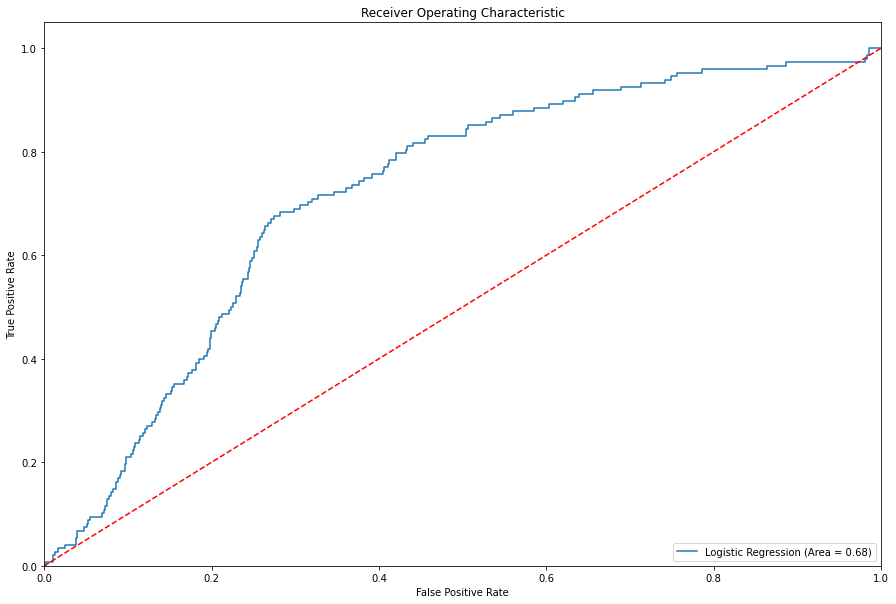

In [58]:
logit_roc_auc = roc_auc_score(y_test_lr, lr3.predict(X_important_test_lr2))
fpr, tpr, thresholds = roc_curve(y_test_lr, lr3.predict_proba(X_important_test_lr2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show();

<b><i><span style="color:#2E4053"> Due to the significant imbalance in classes, the precision for the bankrupt class remains low (because of the low n-size, in comparison to the number of false positives from the majority class). However, the overall accuracy of the model can be improved by boosting recall by adjusting the threshold for logistic regression classification. The team iterated through different threshold values by looking at the ROC curve. However, in the end it was decided that the methodology relies on arbitrarily picking a value to induce positive predictions.</span></i>

## 2. Feature selection with Sequential Feature Selector

In [59]:
features = df_reduced.loc[:, df_reduced.columns != 'Bankruptcy'].columns
features

Index(['Attr1', 'Attr2', 'Attr4', 'Attr5', 'Attr9', 'Attr12', 'Attr13',
       'Attr15', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr24',
       'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr32', 'Attr33', 'Attr34',
       'Attr36', 'Attr39', 'Attr40', 'Attr41', 'Attr43', 'Attr45', 'Attr47',
       'Attr48', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60',
       'Attr61', 'Attr63', 'Attr64', 'ZScore'],
      dtype='object')

In [60]:
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=7,
           forward=True,
           verbose=2,
           scoring='balanced_accuracy',
           cv= StratifiedKFold(n_splits=10, shuffle=True, random_state=1))
#For an imbalanced data set like here, Stratified K-Fold ensures that each fold of dataset 
#has the same proportion of observations with a given label. This intrun gives better results. 
fselector = forward_feature_selector.fit(X,y,custom_feature_names=features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  1.9min finished

[2022-01-11 21:38:05] Features: 1/7 -- score: 0.6594088888430335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   56.6s finished

[2022-01-11 21:39:02] Features: 2/7 -- score: 0.785501008250976[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   55.1s finished

[2022-01-11 21:39:57] Features: 3/7 -- score: 0.7938957800057944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [61]:
pd.DataFrame.from_dict(fselector.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)","[0.6961588260681916, 0.6732330394393407, 0.685...",0.659409,"(Attr27,)",0.023397,0.031503,0.010501
2,"(11, 14)","[0.7739996300635057, 0.8036048256160471, 0.812...",0.785501,"(Attr21, Attr27)",0.02176,0.029298,0.009766
3,"(11, 14, 34)","[0.7842037116961589, 0.8240129888813531, 0.834...",0.793896,"(Attr21, Attr27, Attr60)",0.024133,0.032493,0.010831
4,"(11, 14, 27, 34)","[0.7954148426742298, 0.8352241198594241, 0.844...",0.803412,"(Attr21, Attr27, Attr47, Attr60)",0.023162,0.031186,0.010395
5,"(10, 11, 14, 27, 34)","[0.7954148426742298, 0.8352241198594241, 0.844...",0.803512,"(Attr20, Attr21, Attr27, Attr47, Attr60)",0.02309,0.031088,0.010363
6,"(10, 11, 14, 20, 27, 34)","[0.7954148426742298, 0.8352241198594241, 0.845...",0.803865,"(Attr20, Attr21, Attr27, Attr34, Attr47, Attr60)",0.023278,0.031342,0.010447
7,"(4, 10, 11, 14, 20, 27, 34)","[0.7852107610415767, 0.8250200382267711, 0.844...",0.801774,"(Attr9, Attr20, Attr21, Attr27, Attr34, Attr47...",0.022714,0.030583,0.010194


<i><span style="color:#2E4053"> Features are added sequentially to the model, based on which ones offer the best possible balanced accuracy after being added to the existing model.</span></i>

In [62]:
data1=fselector.k_feature_names_  ##selected attributes
selected_feat_fs=pd.Index(data1)
selected_feat_fs

Index(['Attr9', 'Attr20', 'Attr21', 'Attr27', 'Attr34', 'Attr47', 'Attr60'], dtype='object')

#### Evaluating Selected Features using Random Forest

In [63]:
X_train_fs = X_train[selected_feat_fs] 
y_train_fs = y_train

X_test_fs = X_test[selected_feat_fs]
y_test_fs = y_test

#Create a Gaussian Classifier
clf_fs=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_fs.fit(X_train_fs,y_train_fs.values.ravel())   ##values will give the values in a numpy array (shape: (n,1)) and ravel will convert that array shape to (n, ) (i.e. flatten it)

y_pred_test_fs=clf_fs.predict(X_test_fs)

print("Accuracy:",metrics.accuracy_score(y_test_fs, y_pred_test_fs))

RandomForestClassifier()

Accuracy: 0.97824


In [64]:
print(classification_report(y_test_fs, y_pred_test_fs))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2977
           1       0.93      0.58      0.72       148

    accuracy                           0.98      3125
   macro avg       0.96      0.79      0.85      3125
weighted avg       0.98      0.98      0.98      3125



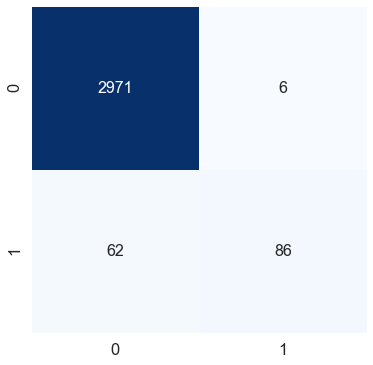

In [105]:
conf_matrix(y_test_fs, y_pred_test_fs)

#### Evaluating Selected Features using Logistic Regression

LogisticRegression(class_weight='balanced', random_state=42)

Accuracy: 0.18016
              precision    recall  f1-score   support

           0       0.97      0.14      0.25      2977
           1       0.05      0.90      0.09       148

    accuracy                           0.18      3125
   macro avg       0.51      0.52      0.17      3125
weighted avg       0.92      0.18      0.24      3125



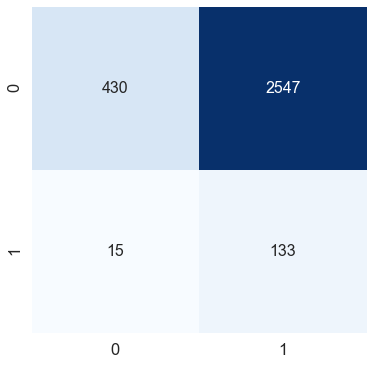

In [106]:
X_train_fs_lr = X_train_lr_1[selected_feat_fs] 
y_train_fs_lr = y_train

X_test_fs_lr = X_test_lr_1[selected_feat_fs]
y_test_fs_lr = y_test

#Create a Gaussian Classifier
clf_fs_lr=LogisticRegression(random_state=42,class_weight = 'balanced')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_fs_lr.fit(X_train_fs_lr,y_train_fs_lr.values.ravel())

y_pred_test_fs_lr=clf_fs_lr.predict(X_test_fs_lr)

print("Accuracy:",metrics.accuracy_score(y_test_fs_lr, y_pred_test_fs_lr))
print(classification_report(y_test_fs_lr, y_pred_test_fs_lr))
conf_matrix(y_test_fs_lr, y_pred_test_fs_lr)

array([1, 1, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.97      0.14      0.25      2977
           1       0.05      0.90      0.09       148

    accuracy                           0.18      3125
   macro avg       0.51      0.52      0.17      3125
weighted avg       0.92      0.18      0.24      3125



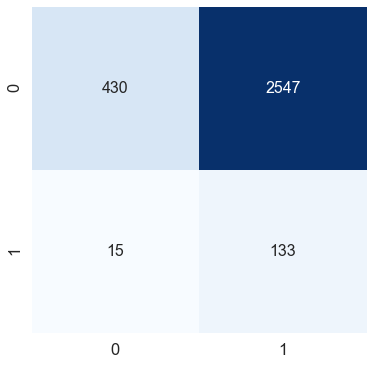

In [107]:
Threshold3 = 0.50
SensitivityCheck3 = np.where(clf_fs_lr.predict_proba(X_test_fs_lr)[:, 1] >= Threshold3, 1, 0)
SensitivityCheck3
print(classification_report(y_test_fs_lr, SensitivityCheck3))
conf_matrix(y_test_fs_lr, SensitivityCheck3)

The final decision on which and how many features to select was made after going through multiple iterations of the above described process. Here are some of our findings:<ul><li>Sequential Feature Selection (Forward Selection) offered more explainable results with fewer features being selected. This is also helpful in reducing the variance of the final model.</li><li>After iterating through selecting different number of features and different scoring strategies, the team decided that selecting 7 features while trying to improve the balanced accuracy is the best solution. This was done while also looking at precision and recall for both classes.</li><li>The incremental benefit in model performance is minimal once more attributes are added after the 7th one. As the benefit starts to plateau, the team decided to finally work with the 7 features selected by SFS, rather than going with those from SelectFromModel.</li><li>Additionally, the balanced accuracy scoring method helped to account for the data class imbalance in the model.</li></ul>
    As seen from the baseline models, there is a significant bias towards the 0 class (not bankrupt). This leads to data models misclassifying bankrupt companies as not bankrupt. While both Logistic Regression and Random Forest face this challenge, the logit model fares far worse. Hence the team decided on Random Forest as the classification algorithm.<br>

## Hyperparameter Tuning using RandomizedSearchCV for the Random Forest Model

To get an idea of optimal parameters, will try adjusting the following set of hyperparameters by using RandomizedSearchCV:
* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [70]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#class_weight 
class_weight = [{1:0.5, 0:0.5}, {1:0.6, 0:0.4}, {1:0.8, 0:0.2}, {1:0.9, 0:0.1}] 
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight' : class_weight}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'class_weight': [{1: 0.5, 0: 0.5}, {1: 0.6, 0: 0.4}, {1: 0.8, 0: 0.2}, {1: 0.9, 0: 0.1}]}


In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# cv -> Random search of parameters, using 10 fold stratified cross validation, 
# n_iter -> search across 30 different combinations, and use all available cores
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv=skf , verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_fs, y_train_fs.values.ravel())

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{0: 0.5, 1: 0.5},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.2, 1: 0.8},
                                                         {0: 0.1, 1: 0.9}],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                       

In [72]:
# view the best parameters from fitting the random search:
rf_random.best_params_
best_random = rf_random.best_estimator_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'class_weight': {1: 0.6, 0: 0.4},
 'bootstrap': False}

In [73]:
best_random

RandomForestClassifier(bootstrap=False, class_weight={0: 0.4, 1: 0.6},
                       max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1000)

In [74]:
y_pred_test_rf_hp = rf_random.predict(X_test_fs)

In [75]:
print(classification_report(y_test_fs, y_pred_test_rf_hp))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2977
           1       0.99      0.59      0.74       148

    accuracy                           0.98      3125
   macro avg       0.98      0.80      0.87      3125
weighted avg       0.98      0.98      0.98      3125



## Hyperparameter Tuning using GridSearchCV for the Logistic Regression Model

In [77]:
# Create param grid.
param_grid = [
    {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['sag'],
    'class_weight' : ['balanced']}
]

lr_hp = LogisticRegression()

# Create grid search object

clf_lr_hp = GridSearchCV(lr_hp, param_grid = param_grid, cv = skf, verbose=True, n_jobs=-1)

# Fit on data
X_test_fs_lr_hp = X_test_lr_1[selected_feat_fs]
y_test_fs_lr_hp = y_test_fs_lr

best_clf_lr_hp = clf_lr_hp.fit(X_train_fs_lr, y_train_fs_lr)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


Accuracy: 0.28288
              precision    recall  f1-score   support

           0       0.96      0.26      0.41      2977
           1       0.05      0.80      0.10       148

    accuracy                           0.28      3125
   macro avg       0.51      0.53      0.25      3125
weighted avg       0.92      0.28      0.39      3125



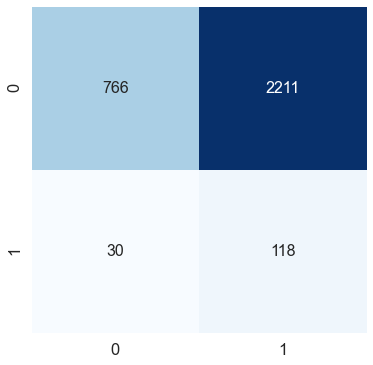

In [108]:
y_pred_test_fs_lr_hp=best_clf_lr_hp.predict(X_test_fs_lr)

print("Accuracy:",metrics.accuracy_score(y_test_fs_lr_hp, y_pred_test_fs_lr_hp))
print(classification_report(y_test_fs_lr_hp, y_pred_test_fs_lr_hp))
conf_matrix(y_test_fs_lr_hp, y_pred_test_fs_lr_hp)

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2977
           1       0.00      0.00      0.00       148

    accuracy                           0.95      3125
   macro avg       0.48      0.50      0.49      3125
weighted avg       0.91      0.95      0.93      3125



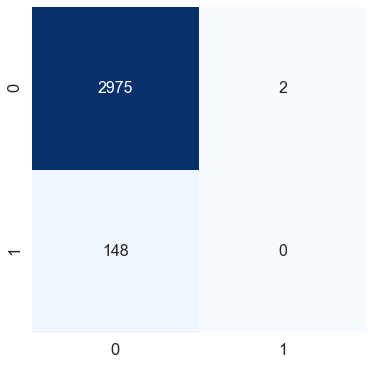

In [109]:
Threshold3 = 0.505
SensitivityCheck4= np.where(clf_lr_hp.predict_proba(X_test_fs_lr_hp)[:, 1] >= Threshold3, 1, 0)
SensitivityCheck4
print(classification_report(y_test_fs_lr_hp, SensitivityCheck4))
conf_matrix(y_test_fs_lr_hp, SensitivityCheck4)

#### As we can see from above the Logistic Regression model is having very high variance (i.e) if we change the threshold by just 0.05 the accuracy and the f1 score values changes drastically.

## Synthetic Minority Over Sampling Technique (SMOTE)

<AxesSubplot:xlabel='Bankruptcy', ylabel='count'>

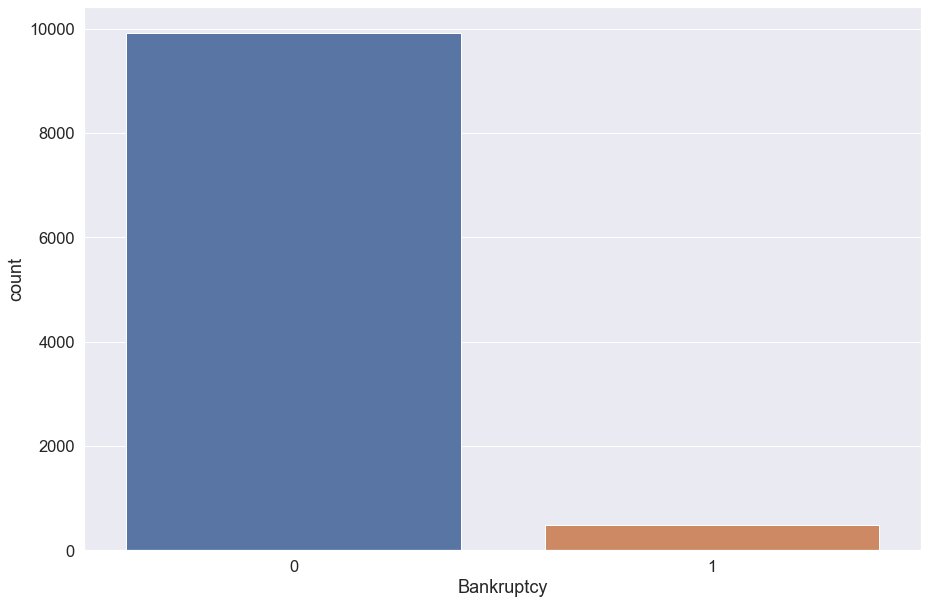

In [110]:
sns.countplot(x="Bankruptcy", data=df_reduced)

<i><span style="color:#2E4053">As evident from the above, there is significant skewness in the data. To try to solve this problem, we are going to try to upsample the minority class by creating synthetic data points using SMOTE.</span></i>

In [111]:
count_class_0, count_class_1 = df_reduced.Bankruptcy.value_counts()
count_class_0, count_class_1

(9923, 493)

In [112]:
#Divide by class
df_class_0 = df_reduced[df_reduced['Bankruptcy'] == int(0)]
df_class_1 = df_reduced[df_reduced['Bankruptcy'] == int(1)]
df_class_0.shape
df_class_1.shape

(9923, 40)

(493, 40)

In [113]:
df_reduced.shape

(10416, 40)

In [114]:
X_train_sm = X_train
y_train_sm = y_train

X_test_sm = X_test
y_test_sm = y_test

In [115]:
X_train_sm.shape
y_train_sm.value_counts()

(7291, 39)

0    6946
1     345
Name: Bankruptcy, dtype: int64

In [116]:
y_test_sm.value_counts()

0    2977
1     148
Name: Bankruptcy, dtype: int64

In [117]:
over = SMOTE(random_state = 42,sampling_strategy=0.5)
steps = [('o', over)]
pipe = Pipeline(steps=steps)
X_train_re_sm,y_train_re_sm = pipe.fit_resample(X_train_sm,y_train_sm)

In [118]:
y_train_re_sm.value_counts()

0    6946
1    3473
Name: Bankruptcy, dtype: int64

In [119]:
X_train_re_sm = X_train_re_sm[selected_feat_fs]
X_train_re_sm

,Attr9,Attr20,Attr21,Attr27,Attr34,Attr47,Attr60
0,2.090900,22.607000,0.808840,5.853300,4.993300,24.303000,16.146000
1,2.959900,31.895000,0.868980,-2.909100,7.283500,31.279000,11.444000
2,1.696500,94.791000,0.982730,7.178000,3.717900,97.773000,3.850600
3,2.911600,22.080000,1.486200,2.498800,3.606200,22.459000,16.531000
4,3.413900,12.280000,2.303700,1.814900,6.172700,12.926000,29.724000
...,...,...,...,...,...,...,...
10414,2.326294,12.377794,1.017164,69.533266,18.967182,10.329640,13.756060
10415,4.112032,1.781719,1.034894,48.052984,22.364488,1.915929,52.296581
10416,0.585182,85.412606,0.954620,-2.557095,0.747307,69.005100,4.796068
10417,1.037097,45.076162,1.093631,0.869430,0.089252,46.679980,8.156386


## Applying Random Forest Classifier after SMOTE to check the performance variation

In [120]:
random_forest_model_sm = RandomForestClassifier()

random_forest_model_sm.fit(X_train_re_sm, y_train_re_sm.values.ravel())

RandomForestClassifier()

In [121]:
X_test_sm = X_test_sm[selected_feat_fs]
X_test_sm

,Attr9,Attr20,Attr21,Attr27,Attr34,Attr47,Attr60
3194,2.65580,16.88300,1.45820,144.21000,2.587900,19.08100,21.6200
6250,1.12700,24.79300,1.16510,1.18000,0.350970,27.94300,14.7220
3303,1.42040,0.50096,0.86479,19.65100,14.419000,0.54009,728.6000
9343,1.01610,49.12500,2.20680,-0.00129,-0.000401,49.91800,7.4300
7705,1.03810,2.54700,1.11610,0.33882,0.702050,2.64410,143.3100
...,...,...,...,...,...,...,...
8980,2.31770,27.12300,1.02890,0.00000,0.000000,37.07200,13.4570
4348,2.01550,25.54600,0.70471,143.70000,5.522700,26.06200,14.2880
9419,0.95995,35.17000,0.63608,161.21000,9.982700,35.37700,10.3780
5219,3.18970,11.65200,1.37870,1.07105,10.270000,12.32600,31.3260


In [122]:
y_pred_class_rf_sm = random_forest_model_sm.predict(X_test_sm)
print(classification_report(y_test_sm, y_pred_class_rf_sm))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2977
           1       0.46      0.52      0.49       148

    accuracy                           0.95      3125
   macro avg       0.72      0.74      0.73      3125
weighted avg       0.95      0.95      0.95      3125



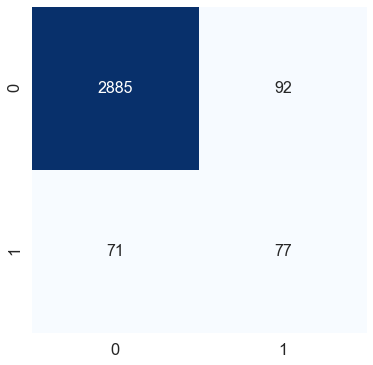

In [131]:
conf_matrix(y_test_sm, y_pred_class_rf_sm)

#### After trying SMOTE to balance data, the Random Forest Classifier picks up more noise. This leads to a drop in performance, hence the team selected the previous RF classifier with tuned hyper parameters.

## Training on the entire Data using the tuned Random Forest Classifier model for production

In [124]:
# Split df into x and y
X_final = df_reduced[selected_feat_fs]
y_final = df_reduced['Bankruptcy']

In [125]:
X_final

,Attr9,Attr20,Attr21,Attr27,Attr34,Attr47,Attr60
0,1.19610,37.5730,0.99690,1.97370,0.714530,44.9410,9.7145
1,1.60180,60.9540,5.08890,44.59300,3.383600,62.6780,5.9882
2,1.00770,53.8810,0.67451,0.32153,0.179600,54.2960,6.7742
3,1.05090,86.3170,0.62795,0.44844,0.128240,90.7070,4.2286
4,1.33930,140.8600,1.20390,44.94700,2.657400,171.0500,2.5912
...,...,...,...,...,...,...,...
10498,1.01200,9.5696,0.98388,0.86943,0.046400,9.6842,38.1420
10499,0.94694,25.1850,0.72732,0.86943,-0.078891,23.8490,14.4930
10500,1.09990,58.1790,0.95313,-2.76940,1.529300,49.8440,6.2737
10501,1.01230,61.1650,0.75106,0.86943,0.046714,61.9190,5.9675


In [126]:
y_final

0        0
1        0
2        0
3        0
4        0
        ..
10498    1
10499    1
10500    1
10501    1
10502    1
Name: Bankruptcy, Length: 10416, dtype: int32

In [127]:
final_model = RandomForestClassifier(**rf_random.best_params_)

In [128]:
final_model.fit(X_final,y_final.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight={0: 0.4, 1: 0.6},
                       max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1000)

## Conclusion

In [129]:
print(classification_report(y_test_fs, y_pred_test_rf_hp))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2977
           1       0.99      0.59      0.74       148

    accuracy                           0.98      3125
   macro avg       0.98      0.80      0.87      3125
weighted avg       0.98      0.98      0.98      3125



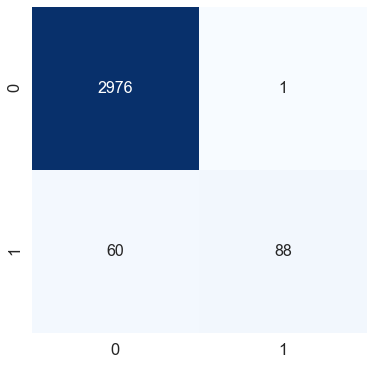

In [130]:
conf_matrix(y_test_fs, y_pred_test_rf_hp)

#### The final classification model is defined above. It has an accuracy of 98% and can confidently predict for bankruptcy with a recall of 59%. Our recommendation is to put the aforementioned model into production.

# Appendix

## [1] Available Metrics

| Attribute | Attribute Number | Description |
| --------- | ---------------- | ----------- |
|Attr1|	X1|net profit / total assets <br>
|Attr2|	X2|total liabilities / total assets <br>
|Attr3|	X3|working capital / total assets <br>
|Attr4|	X4|current assets / short-term liabilities <br>
|Attr5|	X5|[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 <br>
|Attr6|	X6|retained earnings / total assets <br>
|Attr7|	X7|EBIT / total assets <br>
|Attr8|	X8|book value of equity / total liabilities <br>
|Attr9|	X9|sales / total assets <br>
|Attr10|X10|equity / total assets <br>
|Attr11|X11|(gross profit + extraordinary items + financial expenses) / total assets <br>
|Attr12|X12|gross profit / short-term liabilities <br>
|Attr13|X13|(gross profit + depreciation) / sales <br>
|Attr14|X14|(gross profit + interest) / total assets <br>
|Attr15|X15|(total liabilities * 365) / (gross profit + depreciation) <br>
|Attr16|X16|(gross profit + depreciation) / total liabilities <br>
|Attr17|X17|total assets / total liabilities <br>
|Attr18|X18|gross profit / total assets <br>
|Attr19|X19|gross profit / sales <br>
|Attr20|X20|(inventory * 365) / sales <br>
|Attr21|X21|sales (n) / sales (n-1) <br>
|Attr22|X22|profit on operating activities / total assets <br>
|Attr23|X23|net profit / sales <br>
|Attr24|X24|gross profit (in 3 years) / total assets <br>
|Attr25|X25|(equity - share capital) / total assets <br>
|Attr26|X26|(net profit + depreciation) / total liabilities <br>
|Attr27|X27|profit on operating activities / financial expenses <br>
|Attr28|X28|working capital / fixed assets <br>
|Attr29|X29|logarithm of total assets <br>
|Attr30|X30|(total liabilities - cash) / sales <br>
|Attr31|X31|(gross profit + interest) / sales <br>
|Attr32|X32|(current liabilities * 365) / cost of products sold <br>
|Attr33|X33|operating expenses / short-term liabilities <br>
|Attr34|X34|operating expenses / total liabilities <br>
|Attr35|X35|profit on sales / total assets <br>
|Attr36|X36|total sales / total assets <br>
|Attr37|X37|(current assets - inventories) / long-term liabilities <br>
|Attr38|X38|constant capital / total assets <br>
|Attr39|X39|profit on sales / sales <br>
|Attr40|X40|(current assets - inventory - receivables) / short-term liabilities <br>
|Attr41|X41|total liabilities / ((profit on operating activities + depreciation) * (12/365)) <br>
|Attr42|X42|profit on operating activities / sales <br>
|Attr43|X43|rotation receivables + inventory turnover in days <br>
|Attr44|X44|(receivables * 365) / sales <br>
|Attr45|X45|net profit / inventory <br>
|Attr46|X46|(current assets - inventory) / short-term liabilities <br>
|Attr47|X47|(inventory * 365) / cost of products sold <br>
|Attr48|X48|EBITDA (profit on operating activities - depreciation) / total assets <br>
|Attr49|X49|EBITDA (profit on operating activities - depreciation) / sales <br>
|Attr50|X50|current assets / total liabilities <br>
|Attr51|X51|short-term liabilities / total assets <br>
|Attr52|X52|(short-term liabilities * 365) / cost of products sold) <br>
|Attr53|X53|equity / fixed assets <br>
|Attr54|X54|constant capital / fixed assets <br>
|Attr55|X55|working capital <br>
|Attr56|X56|(sales - cost of products sold) / sales <br>
|Attr57|X57|(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) <br>
|Attr58|X58|total costs /total sales <br>
|Attr59|X59|long-term liabilities / equity <br>
|Attr60|X60|sales / inventory <br>
|Attr61|X61|sales / receivables <br>
|Attr62|X62|(short-term liabilities *365) / sales <br>
|Attr63|X63|sales / short-term liabilities <br>
|Attr64|X64|sales / fixed assets <br>
|Class|X65|Bankruptcy